# DATA ANALYSIS

beginning of a short data analysis
***

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [205]:
# Display code copied to make displaying tables easier
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2 style="text-align: center;">{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

In [206]:
df = pd.read_csv('output.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   match_uid     242 non-null    object 
 1   player_uid    242 non-null    int64  
 2   name          242 non-null    object 
 3   hero_id       242 non-null    int64  
 4   is_win        242 non-null    bool   
 5   kills         242 non-null    int64  
 6   deaths        242 non-null    int64  
 7   assists       242 non-null    int64  
 8   hero_damage   242 non-null    float64
 9   hero_healed   242 non-null    float64
 10  damage_taken  242 non-null    float64
 11  heroes        242 non-null    object 
dtypes: bool(1), float64(3), int64(5), object(3)
memory usage: 21.2+ KB


,match_uid,player_uid,name,hero_id,is_win,kills,deaths,assists,hero_damage,hero_healed,damage_taken,heroes
0,6714034_1739047847_94_11001_10,1760979252,Boogerscrotum,1050,False,2,4,3,1434.000000,6792.121636,5171.407166,"[{'hero_id': 1050, 'playtime': {'minutes': 7, ..."
1,6714034_1739047847_94_11001_10,2060844458,SpiderManBulge,1023,False,3,8,3,6320.204075,2842.749824,11076.655098,"[{'hero_id': 1040, 'playtime': {'seconds': 0, ..."
2,6714034_1739047847_94_11001_10,946297425,WoozyMckay,1041,False,5,6,5,7897.712778,6203.631268,3900.479958,"[{'hero_id': 1031, 'playtime': {'minutes': 2, ..."
3,6714034_1739047847_94_11001_10,294125044,Portal112,1029,False,10,8,0,5170.035370,0.000000,4896.128411,"[{'hero_id': 1029, 'playtime': {'minutes': 7, ..."
4,6714034_1739047847_94_11001_10,1816976623,DraconianSpy,1018,False,4,6,0,6029.966664,0.000000,19273.281858,"[{'hero_id': 1011, 'playtime': {'minutes': 5, ..."


In [207]:
df['is_win'] = df['is_win'].astype(int)

Let's do some simple plots of stats against each other, grouping by the match id


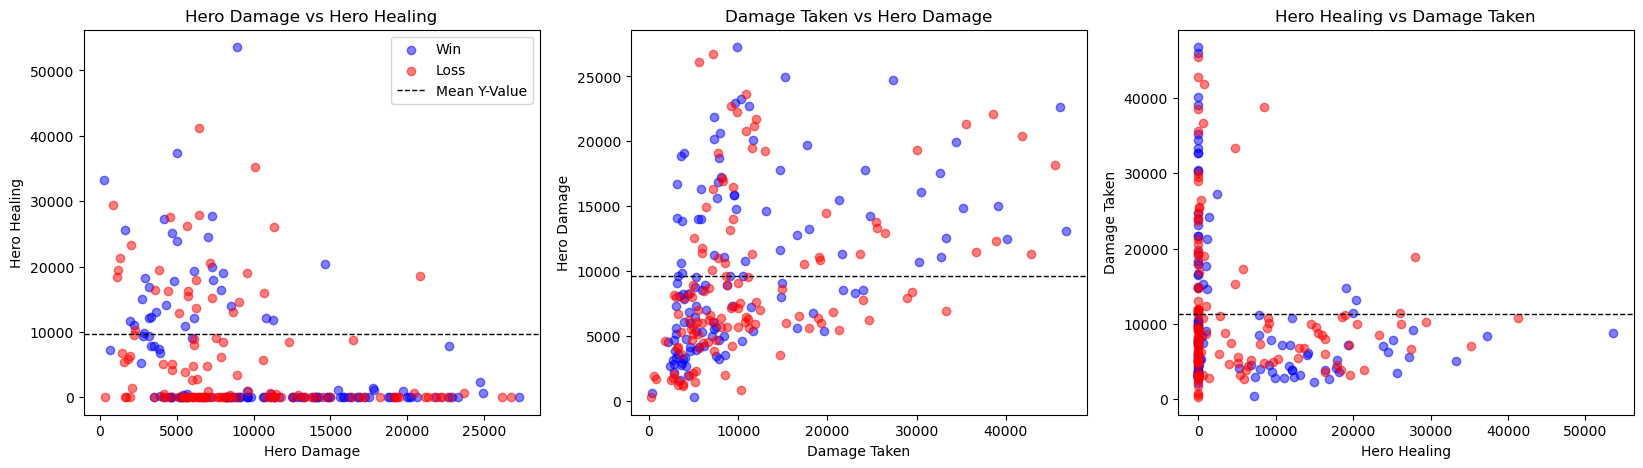

In [208]:
# grab data for win and loss
df_win = df[df['is_win'] == 1]
df_lose = df[df['is_win'] == 0]

mean_dmg = df['hero_damage'].mean()
mean_heal = df['hero_healed'].mean()
mean_dmg_taken = df['damage_taken'].mean()

fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# damage vs healing
axs[0].scatter(data=df_win, x='hero_damage', y='hero_healed', alpha=0.5, c='blue')
axs[0].scatter(data=df_lose, x='hero_damage', y='hero_healed', alpha=0.5, c='red')
axs[0].axhline(mean_dmg, color='black', linestyle='dashed', linewidth=1)
axs[0].set_xlabel('Hero Damage')
axs[0].set_ylabel('Hero Healing')
axs[0].set_title('Hero Damage vs Hero Healing')
axs[0].legend(['Win', 'Loss', 'Mean Y-Value'])

# okay lets take a look at damage taken
axs[1].scatter(data=df_win, x='damage_taken', y='hero_damage', alpha=0.5, c='blue')
axs[1].scatter(data=df_lose, x='damage_taken', y='hero_damage', alpha=0.5, c='red')
axs[1].axhline(mean_dmg, color='black', linestyle='dashed', linewidth=1)
axs[1].set_xlabel('Damage Taken')
axs[1].set_ylabel('Hero Damage')
axs[1].set_title('Damage Taken vs Hero Damage')


# finally lets take a look at healing done vs damage taken
axs[2].scatter(data=df_win, x='hero_healed', y='damage_taken', alpha=0.5, c='blue')
axs[2].scatter(data=df_lose, x='hero_healed', y='damage_taken', alpha=0.5, c='red')
axs[2].axhline(mean_dmg_taken, color='black', linestyle='dashed', linewidth=1)
axs[2].set_xlabel('Hero Healing')
axs[2].set_ylabel('Damage Taken')
axs[2].set_title('Hero Healing vs Damage Taken')


plt.show()

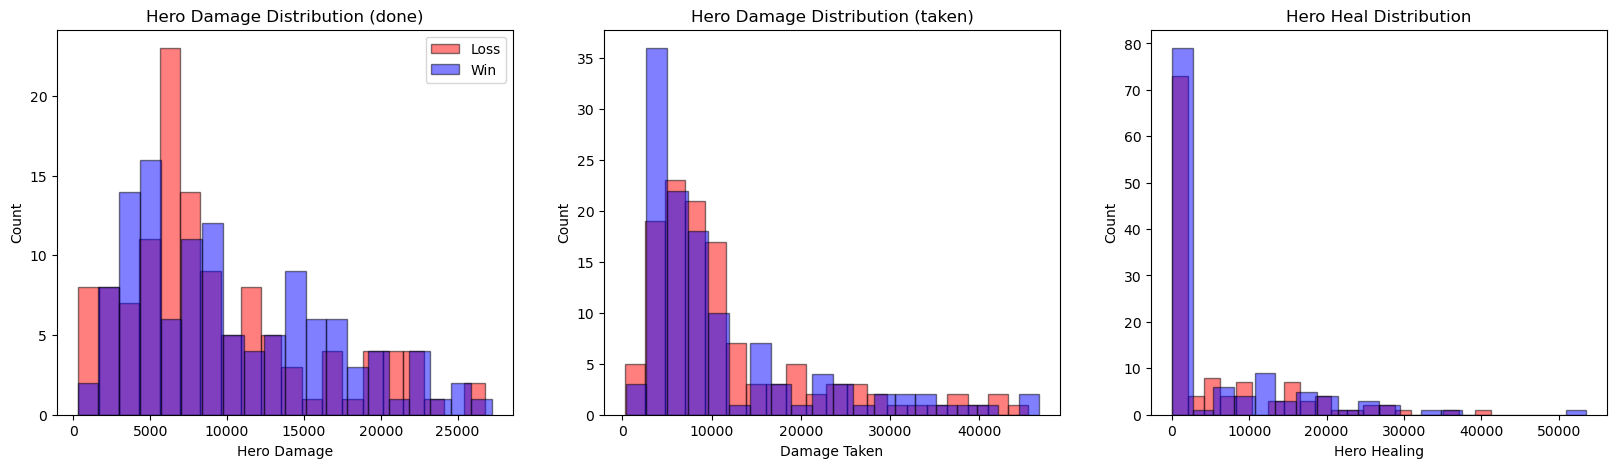

In [209]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

axs[0].hist(df_lose['hero_damage'], bins = 20, alpha=0.5, color='red', label='Loss', edgecolor='black')
axs[0].hist(df_win['hero_damage'], bins = 20, alpha=0.5, color='blue', label='Win', edgecolor='black') 
axs[0].set_xlabel('Hero Damage')
axs[0].set_ylabel('Count')
axs[0].set_title('Hero Damage Distribution (done)')
axs[0].legend()

axs[1].hist(df_lose['damage_taken'], bins = 20, alpha=0.5, color='red', label='Loss', edgecolor='black')
axs[1].hist(df_win['damage_taken'], bins = 20, alpha=0.5, color='blue', label='Win', edgecolor='black') 
axs[1].set_xlabel('Damage Taken')
axs[1].set_ylabel('Count')
axs[1].set_title('Hero Damage Distribution (taken)')

axs[2].hist(df_lose['hero_healed'], bins = 20, alpha=0.5, color='red', label='Loss', edgecolor='black')
axs[2].hist(df_win['hero_healed'], bins = 20, alpha=0.5, color='blue', label='Win', edgecolor='black') 
axs[2].set_xlabel('Hero Healing')
axs[2].set_ylabel('Count')
axs[2].set_title('Hero Heal Distribution')

plt.show()



Consider looking at something similar above but we filter data for support heros or heros that have healing above a certain threshold

***
The scatter plots seem quite noisy with little linear model application, which is normal for a multivariable model like a game. While I will perform a simple regressional analysis, I don't hold hope for this.

Some things we can note from this data pool:

1. **Hero Heal Distribution**
- The large count around 0 asserts overall less supports or supports flexing during the match
- The win count being larger suggests that DPS/Tank Potentially provide a bigger impact on the match
- Similar to the above statment, there are many wins focused around 12000 healing, suggesting sub-support (off-healer) can determine a match win
2. **Hero Damage Distribution (done)**
- We see the highest win to loss ratio in two places, around 15000 dmg and 4000-5000 dmg
- This can suggest that supports are necessary as well see overall lower dmg output from them
    - Likely needs to be broken down into categories by role
- This can suggest a certain dmg threshold needs to be met per match to up the chances of a win (see dmg taken for more insight)

***

Lets take a quick look at KDA as well.

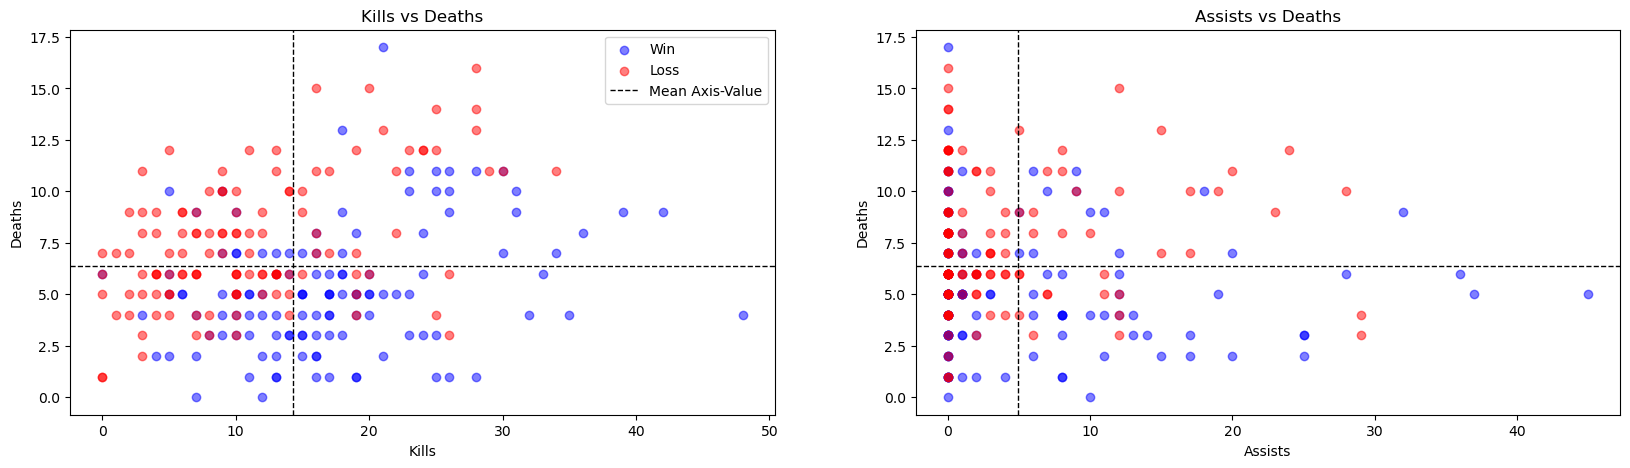

In [210]:
# check kills vs deaths against win/loss
mean_kills = df['kills'].mean()
mean_deaths = df['deaths'].mean()
mean_assists = df['assists'].mean()

fig, axs = plt.subplots(1, 2, figsize=(20, 5))

axs[0].scatter(data=df_win, x='kills', y='deaths', alpha=0.5, c='blue')
axs[0].scatter(data=df_lose, x='kills', y='deaths', alpha=0.5, c='red')
axs[0].axhline(mean_deaths, color='black', linestyle='dashed', linewidth=1)
axs[0].axvline(mean_kills, color='black', linestyle='dashed', linewidth=1)
axs[0].set_xlabel('Kills')
axs[0].set_ylabel('Deaths')
axs[0].set_title('Kills vs Deaths')
axs[0].legend(['Win', 'Loss' , 'Mean Axis-Value'])

axs[1].scatter(data=df_win, x='assists', y='deaths', alpha=0.5, c='blue')
axs[1].scatter(data=df_lose, x='assists', y='deaths', alpha=0.5, c='red')
axs[1].axhline(mean_deaths, color='black', linestyle='dashed', linewidth=1)
axs[1].axvline(mean_assists, color='black', linestyle='dashed', linewidth=1)
axs[1].set_xlabel('Assists')
axs[1].set_ylabel('Deaths')
axs[1].set_title('Assists vs Deaths')


plt.show()


#### Assumption:
Interestingly enough, we can see from the above KD AD plots that kills and kill participation improve winning overall compared to deaths. It's fine to have a large amount of deaths so long as you're getting kills. 
***
Now lets plot the KDA function as a single value against win and loss

C:\Users\jcing\AppData\Local\Temp\ipykernel_96656\457079135.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_win['deaths_adj'] = df_win['deaths'].apply(lambda x: 1 if x == 0 else x)
C:\Users\jcing\AppData\Local\Temp\ipykernel_96656\457079135.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lose['deaths_adj'] = df_lose['deaths'].apply(lambda x: 1 if x == 0 else x)


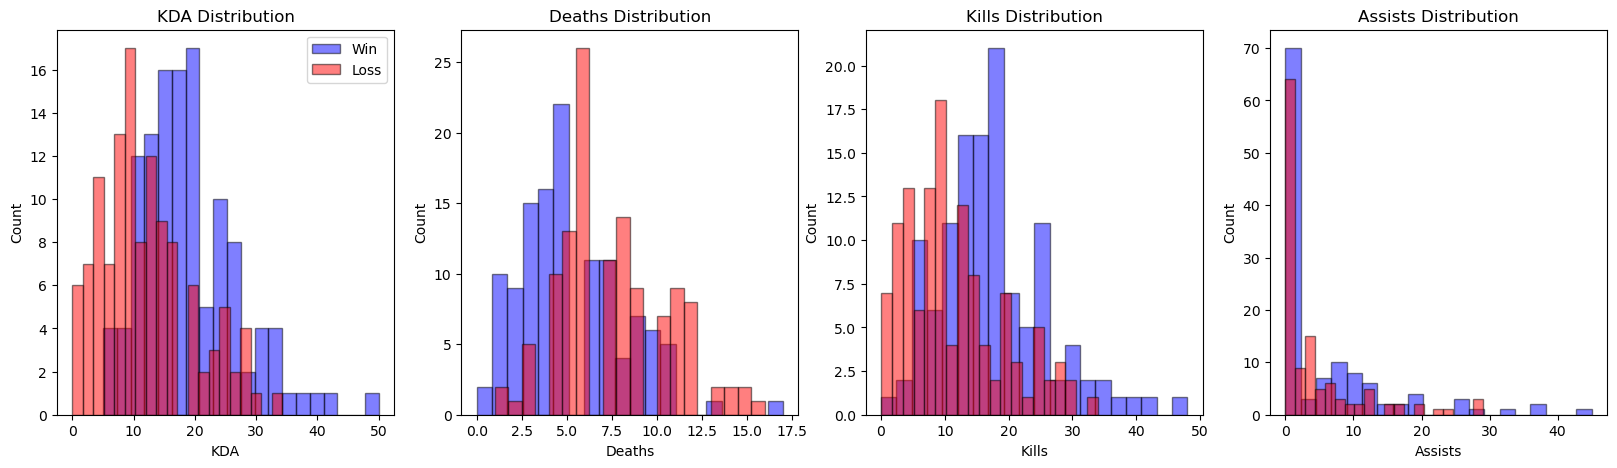

In [211]:
#  Create a new column for adjusted deaths since we can't divide by 0
df_win['deaths_adj'] = df_win['deaths'].apply(lambda x: 1 if x == 0 else x)
df_lose['deaths_adj'] = df_lose['deaths'].apply(lambda x: 1 if x == 0 else x)

KDA_win = df_win['kills'] + df_win['assists'] / df_win['deaths_adj']
KDA_loss = df_lose['kills'] + df_lose['assists'] / df_lose['deaths_adj']

fig, axs = plt.subplots(1, 4, figsize=(20, 5))

axs[0].hist(KDA_win, bins = 20, alpha=0.5, color='blue', label='Win', edgecolor='black')
axs[0].hist(KDA_loss, bins = 20, alpha=0.5, color='red', label='Loss', edgecolor='black')
axs[0].set_xlabel('KDA')
axs[0].set_ylabel('Count')
axs[0].set_title('KDA Distribution')
axs[0].legend()

axs[1].hist(df_win['deaths'], bins = 20, alpha=0.5, color='blue', label='Win', edgecolor='black')
axs[1].hist(df_lose['deaths'], bins = 20, alpha=0.5, color='red', label='Loss', edgecolor='black')
axs[1].set_xlabel('Deaths')
axs[1].set_ylabel('Count')
axs[1].set_title('Deaths Distribution')

axs[2].hist(df_win['kills'], bins = 20, alpha=0.5, color='blue', label='Win', edgecolor='black')
axs[2].hist(df_lose['kills'], bins = 20, alpha=0.5, color='red', label='Loss', edgecolor='black')
axs[2].set_xlabel('Kills')
axs[2].set_ylabel('Count')
axs[2].set_title('Kills Distribution')

axs[3].hist(df_win['assists'], bins = 20, alpha=0.5, color='blue', label='Win', edgecolor='black')
axs[3].hist(df_lose['assists'], bins = 20, alpha=0.5, color='red', label='Loss', edgecolor='black')
axs[3].set_xlabel('Assists')
axs[3].set_ylabel('Count')
axs[3].set_title('Assists Distribution')

plt.show()

As expected we can see that:
1. Higher KDA = more likely to win
    - less deaths > win %
    - more kills > win %

But what is really interesting is the bin sizes. Even when given the same number of bin, there seems to be more independent bins for the 'Lose' parameter.

This suggests that most people who are winning all have similar KDA's (per match) which suggests each person on the team touching the enemy at least once before they die. 

***

Lets see now what the correlation is like for each of these variables independently

In [212]:
import sklearn
import sklearn.linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [213]:
# Train set
heal_train, heal_test, Yh_train, Yh_test = train_test_split(df['hero_healed'], df['is_win'], test_size=0.20, random_state=42)

# fit model 
regression_model = sklearn.linear_model.LinearRegression(copy_X=True).fit(heal_train.values.reshape(-1, 1), Yh_train)
Yh_pred = regression_model.predict(heal_test.values.reshape(-1, 1))

print(f'Regression Coeffs: {regression_model.coef_}\n')

print(f'Mean Squared Error between Y_test & Y_pred: {mean_squared_error(Yh_test, Yh_pred)}\n')

print(f'R^2 Coeffecient: {r2_score(Yh_test, Yh_pred)}')

Regression Coeffs: [-9.37440822e-07]

Mean Squared Error between Y_test & Y_pred: 0.2507723828746936

R^2 Coeffecient: -0.0035074854702323854


We can see independently, healing has little outcome with match win or loss. So lets add all the other variables we've looked at so far! 

In [214]:
test_params = ['kills',	'deaths', 'assists', 'hero_damage',	'hero_healed', 'damage_taken']
test_df = df[test_params]

X_train, X_test, Y_train, Y_test = train_test_split(test_df, df['is_win'], test_size=0.20, random_state=42)

regression_model = sklearn.linear_model.LinearRegression(copy_X=True).fit(X_train, Y_train) 
Y_pred = regression_model.predict(X_test)

print(f'Regression Coeffs: {regression_model.coef_}\n')
print(f'Mean Squared Error between Y_test & Y_pred: {mean_squared_error(Y_test, Y_pred)}\n')
print(f'R^2 Coeffecient: {r2_score(Y_test, Y_pred)}')

cdf1 = pd.DataFrame({
	'Feature': test_df.columns,
	'Coefficient': np.transpose(regression_model.coef_)
})
new_row = pd.DataFrame([{'Feature': 'MSE', 'Coefficient': mean_squared_error(Y_test, Y_pred)}, {'Feature': 'R2', 'Coefficient': r2_score(Y_test, Y_pred)}])
cdf1 = pd.concat([cdf1, new_row], ignore_index=True)


Regression Coeffs: [ 2.80000422e-02 -5.96429220e-02  2.39839999e-02 -8.04375858e-06
 -1.21229482e-05  3.25950754e-06]

Mean Squared Error between Y_test & Y_pred: 0.1466151180259658

R^2 Coeffecient: 0.41329516936609356


This model is a lot better, with R2 of 0.41, so what if we remove all the parameters that have negative regression coeffs?

In [215]:
test_params = ['kills',	'assists', 'damage_taken']
test_df = df[test_params]

X_train, X_test, Y_train, Y_test = train_test_split(test_df, df['is_win'], test_size=0.20, random_state=42)

regression_model = sklearn.linear_model.LinearRegression(copy_X=True).fit(X_train, Y_train)
Y_pred = regression_model.predict(X_test)

print(f'Regression Coeffs: {regression_model.coef_}\n')
print(f'Mean Squared Error between Y_test & Y_pred: {mean_squared_error(Y_test, Y_pred)}\n')
print(f'R^2 Coeffecient: {r2_score(Y_test, Y_pred)}')

cdf2 = pd.DataFrame({
	'Feature': test_df.columns,
	'Coefficient': np.transpose(regression_model.coef_)
})
new_row = pd.DataFrame([{'Feature': 'MSE', 'Coefficient': mean_squared_error(Y_test, Y_pred)}, {'Feature': 'R2', 'Coefficient': r2_score(Y_test, Y_pred)}])
cdf2 = pd.concat([cdf2, new_row], ignore_index=True)

Regression Coeffs: [ 2.37484275e-02  1.16580200e-02 -3.57989182e-06]

Mean Squared Error between Y_test & Y_pred: 0.20532829417765433

R^2 Coeffecient: 0.17834460946575315


It becomes significantly worse. How about we look back at the previous plots and determine what params are best?
- Kills
- Deaths
- Assists
- Damage taken

In [216]:
test_params = ['kills',	'deaths', 'assists', 'damage_taken']
test_df = df[test_params]

X_train, X_test, Y_train, Y_test = train_test_split(test_df, df['is_win'], test_size=0.20, random_state=42)

regression_model = sklearn.linear_model.LinearRegression(copy_X=True).fit(X_train, Y_train)
Y_pred = regression_model.predict(X_test)

print(f'Regression Coeffs: {regression_model.coef_}\n')
print(f'Mean Squared Error between Y_test & Y_pred: {mean_squared_error(Y_test, Y_pred)}\n')
print(f'R^2 Coeffecient: {r2_score(Y_test, Y_pred)}')

cdf3 = pd.DataFrame({
	'Feature': test_df.columns,
	'Coefficient': np.transpose(regression_model.coef_)
})
new_row = pd.DataFrame([{'Feature': 'MSE', 'Coefficient': mean_squared_error(Y_test, Y_pred)}, {'Feature': 'R2', 'Coefficient': r2_score(Y_test, Y_pred)}])
cdf3 = pd.concat([cdf3, new_row], ignore_index=True)

Regression Coeffs: [ 2.51267994e-02 -6.59718465e-02  1.40154791e-02  3.16562263e-06]

Mean Squared Error between Y_test & Y_pred: 0.14186862066392047

R^2 Coeffecient: 0.43228906964321157


This is the best R^2 value yet. Let's check to see if KDA independently gives a higher score.

In [217]:
test_params = ['kills',	'deaths', 'assists']
test_df = df[test_params]

X_train, X_test, Y_train, Y_test = train_test_split(test_df, df['is_win'], test_size=0.20, random_state=42)

regression_model = sklearn.linear_model.LinearRegression(copy_X=True).fit(X_train, Y_train)
Y_pred = regression_model.predict(X_test)

print(f'Regression Coeffs: {regression_model.coef_}\n')
print(f'Mean Squared Error between Y_test & Y_pred: {mean_squared_error(Y_test, Y_pred)}\n')
print(f'R^2 Coeffecient: {r2_score(Y_test, Y_pred)}')

cdf4 = pd.DataFrame({
	'Feature': test_df.columns,
	'Coefficient': np.transpose(regression_model.coef_)
})
new_row = pd.DataFrame([{'Feature': 'MSE', 'Coefficient': mean_squared_error(Y_test, Y_pred)}, {'Feature': 'R2', 'Coefficient': r2_score(Y_test, Y_pred)}])
cdf4 = pd.concat([cdf4, new_row], ignore_index=True)

Regression Coeffs: [ 0.02594932 -0.06300816  0.01321739]

Mean Squared Error between Y_test & Y_pred: 0.1349127028632897

R^2 Coeffecient: 0.460124334042069


In [218]:
test_params = ['kills',	'deaths']
test_df = df[test_params]

X_train, X_test, Y_train, Y_test = train_test_split(test_df, df['is_win'], test_size=0.20, random_state=42)

regression_model = sklearn.linear_model.LinearRegression(copy_X=True).fit(X_train, Y_train)
Y_pred = regression_model.predict(X_test)

print(f'Regression Coeffs: {regression_model.coef_}\n')
print(f'Mean Squared Error between Y_test & Y_pred: {mean_squared_error(Y_test, Y_pred)}\n')
print(f'R^2 Coeffecient: {r2_score(Y_test, Y_pred)}')

cdf5 = pd.DataFrame({
	'Feature': test_df.columns,
	'Coefficient': np.transpose(regression_model.coef_)
})
new_row = pd.DataFrame([{'Feature': 'MSE', 'Coefficient': mean_squared_error(Y_test, Y_pred)}, {'Feature': 'R2', 'Coefficient': r2_score(Y_test, Y_pred)}])
cdf5 = pd.concat([cdf5, new_row], ignore_index=True)

Regression Coeffs: [ 0.02368258 -0.06214786]

Mean Squared Error between Y_test & Y_pred: 0.13618058269982625

R^2 Coeffecient: 0.45505070156286187


In [219]:
test_params = ['kills']
test_df = df[test_params]

X_train, X_test, Y_train, Y_test = train_test_split(test_df, df['is_win'], test_size=0.20, random_state=42)

regression_model = sklearn.linear_model.LinearRegression(copy_X=True).fit(X_train, Y_train)
Y_pred = regression_model.predict(X_test)

print(f'Regression Coeffs: {regression_model.coef_}\n')
print(f'Mean Squared Error between Y_test & Y_pred: {mean_squared_error(Y_test, Y_pred)}\n')
print(f'R^2 Coeffecient: {r2_score(Y_test, Y_pred)}')

cdf6 = pd.DataFrame({
	'Feature': test_df.columns,
	'Coefficient': np.transpose(regression_model.coef_)
})
new_row = pd.DataFrame([{'Feature': 'MSE', 'Coefficient': mean_squared_error(Y_test, Y_pred)}, {'Feature': 'R2', 'Coefficient': r2_score(Y_test, Y_pred)}])
cdf6 = pd.concat([cdf6, new_row], ignore_index=True)

Regression Coeffs: [0.02053586]

Mean Squared Error between Y_test & Y_pred: 0.21823813094419378

R^2 Coeffecient: 0.12668374600498444


In [220]:
test_params = ['deaths']
test_df = df[test_params]

X_train, X_test, Y_train, Y_test = train_test_split(test_df, df['is_win'], test_size=0.20, random_state=42)

regression_model = sklearn.linear_model.LinearRegression(copy_X=True).fit(X_train, Y_train)
Y_pred = regression_model.predict(X_test)

print(f'Regression Coeffs: {regression_model.coef_}\n')
print(f'Mean Squared Error between Y_test & Y_pred: {mean_squared_error(Y_test, Y_pred)}\n')
print(f'R^2 Coeffecient: {r2_score(Y_test, Y_pred)}')

cdf7 = pd.DataFrame({
	'Feature': test_df.columns,
	'Coefficient': np.transpose(regression_model.coef_)
})
new_row = pd.DataFrame([{'Feature': 'MSE', 'Coefficient': mean_squared_error(Y_test, Y_pred)}, {'Feature': 'R2', 'Coefficient': r2_score(Y_test, Y_pred)}])
cdf7 = pd.concat([cdf7, new_row], ignore_index=True)


Regression Coeffs: [-0.05347751]

Mean Squared Error between Y_test & Y_pred: 0.21283535667292333

R^2 Coeffecient: 0.14830384771385174


In [221]:
test_params = test_params = ['hero_damage',	'hero_healed', 'damage_taken']

test_df = df[test_params]

X_train, X_test, Y_train, Y_test = train_test_split(test_df, df['is_win'], test_size=0.20, random_state=42)

regression_model = sklearn.linear_model.LinearRegression(copy_X=True).fit(X_train, Y_train)
Y_pred = regression_model.predict(X_test)

print(f'Regression Coeffs: {regression_model.coef_}\n')
print(f'Mean Squared Error between Y_test & Y_pred: {mean_squared_error(Y_test, Y_pred)}\n')
print(f'R^2 Coeffecient: {r2_score(Y_test, Y_pred)}')

cdf8 = pd.DataFrame({
	'Feature': test_df.columns,
	'Coefficient': np.transpose(regression_model.coef_)
})
new_row = pd.DataFrame([{'Feature': 'MSE', 'Coefficient': mean_squared_error(Y_test, Y_pred)}, {'Feature': 'R2', 'Coefficient': r2_score(Y_test, Y_pred)}])
cdf8 = pd.concat([cdf7, new_row], ignore_index=True)

Regression Coeffs: [ 1.16705776e-05  1.23792838e-06 -2.53089981e-06]

Mean Squared Error between Y_test & Y_pred: 0.2485139783146215

R^2 Coeffecient: 0.005529896777656362


In [222]:
#display_side_by_side(cdf1, cdf2, cdf3, cdf4, cdf5, cdf6, cdf7)
dfs = [cdf1, cdf2, cdf3, cdf4, cdf5, cdf6, cdf7]
final_df = dfs[0]

for i, dfa in enumerate(dfs[1:], start=2):
    dfa.columns = ['Feature', f'Coefficient_{i}', f'Coefficient_{i}_2'] if dfa.shape[1] == 3 else ['Feature', f'Coefficient_{i}']
    final_df = pd.merge(final_df, dfa, on='Feature', how='outer')

display(final_df)

,Feature,Coefficient,Coefficient_2,Coefficient_3,Coefficient_4,Coefficient_5,Coefficient_6,Coefficient_7
0,MSE,0.146615,0.205328,0.141869,0.134913,0.136181,0.218238,0.212835
1,R2,0.413295,0.178345,0.432289,0.460124,0.455051,0.126684,0.148304
2,assists,0.023984,0.011658,0.014015,0.013217,NaN,NaN,NaN
3,damage_taken,0.000003,-0.000004,0.000003,NaN,NaN,NaN,NaN
4,deaths,-0.059643,NaN,-0.065972,-0.063008,-0.062148,NaN,-0.053478
5,hero_damage,-0.000008,NaN,NaN,NaN,NaN,NaN,NaN
6,hero_healed,-0.000012,NaN,NaN,NaN,NaN,NaN,NaN
7,kills,0.028000,0.023748,0.025127,0.025949,0.023683,0.020536,NaN


In [ ]:
final_df.set_index('Feature', inplace=True)

,Coefficient,Coefficient_2,Coefficient_3,Coefficient_4,Coefficient_5,Coefficient_6,Coefficient_7
Feature,,,,,,,
MSE,0.146615,0.205328,0.141869,0.134913,0.136181,0.218238,0.212835
R2,0.413295,0.178345,0.432289,0.460124,0.455051,0.126684,0.148304
assists,0.023984,0.011658,0.014015,0.013217,NaN,NaN,NaN
damage_taken,0.000003,-0.000004,0.000003,NaN,NaN,NaN,NaN
deaths,-0.059643,NaN,-0.065972,-0.063008,-0.062148,NaN,-0.053478
hero_damage,-0.000008,NaN,NaN,NaN,NaN,NaN,NaN
hero_healed,-0.000012,NaN,NaN,NaN,NaN,NaN,NaN
kills,0.028000,0.023748,0.025127,0.025949,0.023683,0.020536,NaN


In [ ]:
# Ensure all columns are numeric
final_df_numeric = final_df.apply(pd.to_numeric, errors='coerce')

sorted_columns = final_df_numeric.iloc[1].sort_values(ascending=False).index

# Reorder the columns in the DataFrame
df_sorted = final_df.reindex(columns=sorted_columns)



,Coefficient_4,Coefficient_5,Coefficient_3,Coefficient,Coefficient_2,Coefficient_7,Coefficient_6,Feature
0,0.134913,0.136181,0.141869,0.146615,0.205328,0.212835,0.218238,MSE
1,0.460124,0.455051,0.432289,0.413295,0.178345,0.148304,0.126684,R2
2,0.013217,NaN,0.014015,0.023984,0.011658,NaN,NaN,assists
3,NaN,NaN,0.000003,0.000003,-0.000004,NaN,NaN,damage_taken
4,-0.063008,-0.062148,-0.065972,-0.059643,NaN,-0.053478,NaN,deaths
5,NaN,NaN,NaN,-0.000008,NaN,NaN,NaN,hero_damage
6,NaN,NaN,NaN,-0.000012,NaN,NaN,NaN,hero_healed
7,0.025949,0.023683,0.025127,0.028000,0.023748,NaN,0.020536,kills


In [228]:
df_sorted.set_index('Feature', inplace=True)
display(df_sorted)

,Coefficient_4,Coefficient_5,Coefficient_3,Coefficient,Coefficient_2,Coefficient_7,Coefficient_6
Feature,,,,,,,
MSE,0.134913,0.136181,0.141869,0.146615,0.205328,0.212835,0.218238
R2,0.460124,0.455051,0.432289,0.413295,0.178345,0.148304,0.126684
assists,0.013217,NaN,0.014015,0.023984,0.011658,NaN,NaN
damage_taken,NaN,NaN,0.000003,0.000003,-0.000004,NaN,NaN
deaths,-0.063008,-0.062148,-0.065972,-0.059643,NaN,-0.053478,NaN
hero_damage,NaN,NaN,NaN,-0.000008,NaN,NaN,NaN
hero_healed,NaN,NaN,NaN,-0.000012,NaN,NaN,NaN
kills,0.025949,0.023683,0.025127,0.028000,0.023748,NaN,0.020536


### Regression Model Coeff Table

Above we can see a table that is sorted (descending left to right) for the highest R^2 value and lowest MSE.  Values where `NaN` appear are variables that were not used in the linear regression. 